In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import f1_score
import scipy as sp
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [111]:
# read in datasets
x_test = pd.read_csv('x_test.csv',index_col=0)
x_train = pd.read_csv('x_train.csv',index_col=0)
y_test = pd.read_csv('y_test.csv',index_col=0)
y_train = pd.read_csv('y_train.csv',index_col=0)

In [112]:
# Function f1_genre
# input: two pandas dataframes, 
    # genre_real: predicted values
    # genre_predict: real values
# output: mean f1 score of each class
def f1_genres(genre_real, genre_predict):
    count_row = len(genre_real)
    if count_row == 0:
        print "No data in dataframe!"
        return
    if count_row != len(genre_predict):
        print "Different length of predicted and real dataframes!"
        return
    count_col = len(genre_real.columns)
    if count_col == 0:
        print "No data in dataframe!"
        return
    if count_col != len(genre_predict.columns):
        print "Different genres of predicted and real dataframes!"
        return
    score = 0
    for i in range(count_col):
        score += f1_score(genre_real[genre_real.columns.values[i]], genre_predict[genre_predict.columns.values[i]])
    score = score/count_col
    return(score)

In [113]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_np = scaler.transform(x_train)
x_test_np = scaler.transform(x_test)

indexs_train = x_train.index
indexs_test = x_test.index
x_train = pd.DataFrame(x_train_np, index = indexs_train, columns = x_train.columns)
x_test = pd.DataFrame(x_test_np, index = indexs_test, columns = x_test.columns)

## Tuning Logistic Regression

In [122]:
#### TUNING LOGISTIC REGRESSION #####
#### parameter c (without cross validation)
c = [1, 10, 50, 100, 500, 1000]
score_weighted_log_tune = np.zeros(len(c))
random.seed(0)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.4, random_state=0)

for i in range(len(c)):
    #weighted logistic regression
    genre_pred = pd.DataFrame(index = X_test.index) # dataframe to store predicted values of train

    for col in y_train.columns:
        weighted_logistic = LogisticRegression(class_weight='balanced', C=c[i])
        weighted_logistic.fit(X_train, Y_train[col])
        genre_pred[col]= weighted_logistic.predict(X_test)

    score_weighted_log_tune[i] = f1_genres(Y_test, genre_pred)


Best C: 100


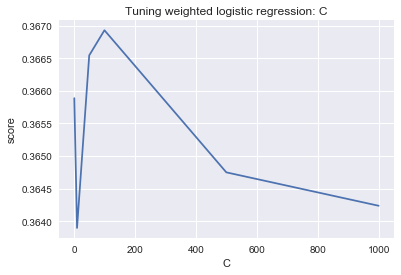

In [123]:
c_best = c[np.argmax(score_weighted_log_tune)]
print 'Best C:', c_best
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(c, score_weighted_log_tune)
plt.xlabel('C')
plt.ylabel('score')
plt.title('Tuning weighted logistic regression: C')
plt.show()

In [124]:
#weighted logistic regression
genre_pred = pd.DataFrame(index = x_test.index) # dataframe to store predicted values

for col in y_train.columns:
    weighted_logistic = LogisticRegression(class_weight='balanced', C = c_best)
    weighted_logistic.fit(x_train, y_train[col])
    genre_pred[col]= weighted_logistic.predict(x_test)

score_weighted_log = f1_genres(y_test, genre_pred)
print score_weighted_log

0.379093348673


-----